# Session 5 : Unsupervised learning

## Preprocessing data

We saw that PCA can be used as a pre-processing step before using supervised learning algorithms in order to improve accuracy or training speed. But sometimes, a simple pre-processing step like normalizing the data can bring a huge improvement.

### No normalization

Before seing any improvements, we need to have a **baseline** (to know if we improve or deteriorate accuracy). We are going to train a classification SVM (with non-linear kernel). Do the following operations:
* load the bread cancer dataset
* separate it into a training and a test set
* create a SVC model, with C=100
* train your model, print its accuracy

I know that you already did it in the last session, but try to see if you can do it again on your own, without any code snippet provided or looking at the correction.

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

modelCancer = SVC(C=100)
modelCancer.fit(X_train, y_train)
print("Train score:", modelCancer.score(X_train, y_train))
print("Test  score:", modelCancer.score(X_test, y_test))

Train score: 0.9413145539906104
Test  score: 0.9440559440559441


### Using built-in normalizers

Let's see what our data looks like before normalization. For each feature, print its minimum and maximum value across all examples in training set.

In [2]:
import numpy as np
print("Max X:",np.amax(X_train))
print("Min X:",np.amin(X_train))
print("Max y:",np.amax(y_train))
print("Min y:",np.amin(y_train))

Max X: 4254.0
Min X: 0.0
Max y: 1
Min y: 0


Now we can use a normalizer, to make sure that each feature has a value between 0 and 1.

In [3]:
from sklearn.preprocessing import MinMaxScaler

# Look at the documentation of MinMaxScaler to find examples
# of use case. Then create a new variable X_train_scaled
# which is the rescaled X_train. Print again the maximum and
# minimum values in X_train_scaled for each features. What
# is the difference ?

scalerMinMaxScaler=MinMaxScaler()
scalerMinMaxScaler.fit(X_train)
X_train_scaled=scalerMinMaxScaler.transform(X_train)
print("Max X:",np.amax(X_train_scaled))
print("Min X:",np.amin(X_train_scaled))

Max X: 1.0000000000000002
Min X: 0.0


Use the same scaler (without modifying it) to also rescale the `X_test` variable.

In [4]:
X_test_scaled=scalerMinMaxScaler.transform(X_test)

Train again a SVC model, but this time train it on the scaled data. Do you see any improvements ?

In [5]:
modelCancerMinMaxScaler = SVC( C=100)
modelCancerMinMaxScaler.fit(X_train_scaled, y_train)
print("Train score:", modelCancerMinMaxScaler.score(X_train_scaled, y_train))
print("Test  score:", modelCancerMinMaxScaler.score(X_test_scaled, y_test))

Train score: 1.0
Test  score: 0.965034965034965


Many more different types of scaler are implemented in scikit-learn :
* MaxAbsScaler
* RobustScaler
* StandardScaler

In [6]:
# Use each type of scaler and train a SVC model for each one.
# Which one is the best ?
from sklearn.preprocessing import MaxAbsScaler,RobustScaler,StandardScaler

scalerMaxAbsScaler=MaxAbsScaler()
scalerMaxAbsScaler.fit(X_train)
X_train_scaled=scalerMaxAbsScaler.transform(X_train)
X_test_scaled=scalerMaxAbsScaler.transform(X_test)
modelCancerMaxAbsScaler = SVC(C=100)
modelCancerMaxAbsScaler.fit(X_train_scaled, y_train)
print("Train MaxAbsScaler score:", modelCancerMaxAbsScaler.score(X_train_scaled, y_train))
print("Test  MaxAbsScaler score:", modelCancerMaxAbsScaler.score(X_test_scaled, y_test))

scalerRobustScaler=RobustScaler()
scalerRobustScaler.fit(X_train)
X_train_scaled=scalerRobustScaler.transform(X_train)
X_test_scaled=scalerRobustScaler.transform(X_test)
modelCancerRobustScaler = SVC(C=100)
modelCancerRobustScaler.fit(X_train_scaled, y_train)
print("Train RobustScaler score:", modelCancerRobustScaler.score(X_train_scaled, y_train))
print("Test  RobustScaler score:", modelCancerRobustScaler.score(X_test_scaled, y_test))

scalerStandardScaler=StandardScaler()
scalerStandardScaler.fit(X_train)
X_train_scaled=scalerStandardScaler.transform(X_train)
X_test_scaled=scalerStandardScaler.transform(X_test)
modelCancerStandardScaler = SVC( C=100)
modelCancerStandardScaler.fit(X_train_scaled, y_train)
print("Train StandardScaler score:", modelCancerStandardScaler.score(X_train_scaled, y_train))
print("Test  StandardScaler score:", modelCancerStandardScaler.score(X_test_scaled, y_test))

Train MaxAbsScaler score: 0.9929577464788732
Test  MaxAbsScaler score: 0.972027972027972
Train RobustScaler score: 1.0
Test  RobustScaler score: 0.951048951048951
Train StandardScaler score: 1.0
Test  StandardScaler score: 0.958041958041958


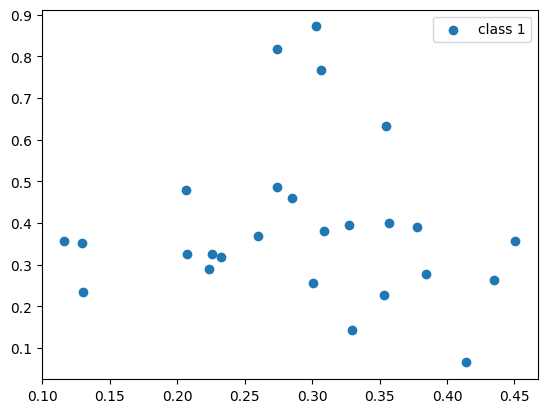

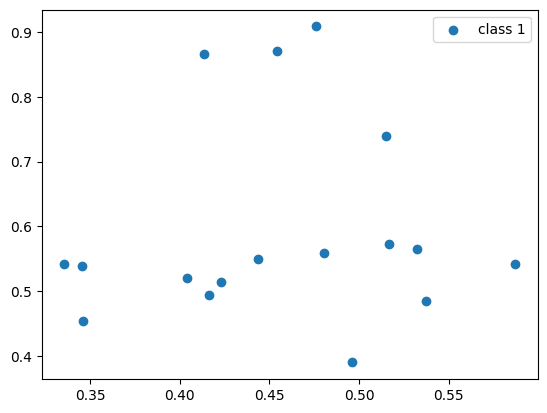

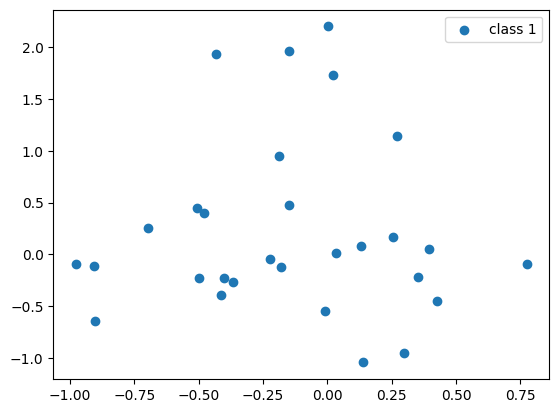

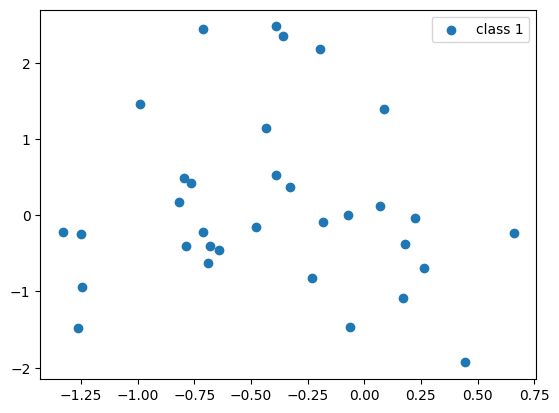

In [7]:
# Look also at the features of your scaled dataset to see
# the differences between the different scalers (do some of
# them keep negative values ? does it change the dimension
# mean/median?)
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(
    modelCancerMinMaxScaler.support_vectors_[modelCancerMinMaxScaler.n_support_[1]:, 0],
    modelCancerMinMaxScaler.support_vectors_[modelCancerMinMaxScaler.n_support_[1]:, 1], label="class 1")
    
plt.legend()
plt.show()

plt.scatter(
    modelCancerMaxAbsScaler .support_vectors_[modelCancerMaxAbsScaler.n_support_[1]:, 0],
    modelCancerMaxAbsScaler .support_vectors_[modelCancerMaxAbsScaler.n_support_[1]:, 1], label="class 1")
    
plt.legend()
plt.show()

plt.scatter(
    modelCancerRobustScaler .support_vectors_[modelCancerRobustScaler.n_support_[1]:, 0],
    modelCancerRobustScaler .support_vectors_[modelCancerRobustScaler.n_support_[1]:, 1], label="class 1")
    
plt.legend()
plt.show()

plt.scatter(
    modelCancerStandardScaler .support_vectors_[modelCancerStandardScaler.n_support_[1]:, 0],
    modelCancerStandardScaler .support_vectors_[modelCancerStandardScaler.n_support_[1]:, 1], label="class 1")
    
plt.legend()
plt.show()

## Principal component analysis

### PCA for 2D visualization

We are going to use the PCA algorithm on the breast cancer dataset. This dataset has 30 features, so we can **not** visualize them.

In [8]:
# If you didn't do it before, scale the breast cancer
# dataset with a StandardScaler(). We do not need to have a
# training and test set, because we want to visualize the 
# entire dataset, so you can apply the scaler on the entire
# dataset.
scalerStandardScaler=StandardScaler()
scalerStandardScaler.fit(cancer.data)
X_scaled=scalerStandardScaler.transform(cancer.data)
modelCancerStandardScaler = SVC( C=100)
modelCancerStandardScaler.fit(X_scaled, cancer.target)

SVC(C=100)

In [9]:
# Now we can use PCA.
from sklearn.decomposition import PCA

# Use the documentation of PCA to create a model that will
# only keep 2 components.
pca = PCA(n_components=2)
pca.fit(X_train_scaled)
# Then call the .fit() method of PCA on your scaled data.

PCA(n_components=2)

In [10]:
# We can now transform the dataset with 30 features into
# a dataset with only 2 features.
X_pca = pca.transform(X_scaled)
print(X_scaled.shape)
print(X_pca.shape)

(569, 30)
(569, 2)


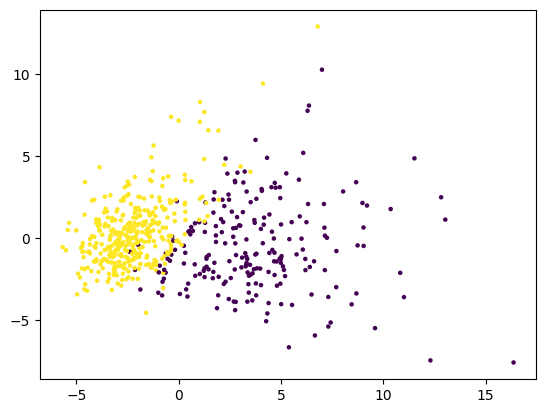

In [11]:
# Now plot the new dataset (the one with only 2 features)
# on a 2D plan. Use a different color for the two classes.
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(X_pca[:,0], X_pca[:,1], c=cancer.target, s=5)
plt.show()

Hum, interesting... It looks like our
dataset is almost linearly separable. This means that a
linear model (like SVM with linear kernel or logistic regression) could do quite well on this dataset. Let's see if that's the case.

In [12]:
# Start by splitting the X_pca dataset into a training
# and a test set with random_state=7 (because we are going 
# to train on this new dataset composed of only 2 features)
X_train, X_test, y_train, y_test = train_test_split(
    X_pca, cancer.target, random_state=7)

In [13]:
# Then create a SVM model with a linear kernel, and train
# it on the data produced *after* the PCA transformation.
# Do you get better accuracy compared to the first SVM model
# you have tested (the one with a non-linear kernel) ?
modelCancerLinearKernel = SVC( kernel='linear')
modelCancerLinearKernel.fit(X_train, y_train)
print("Train LinearKernel score:", modelCancerLinearKernel.score(X_train, y_train))
print("Test  LinearKernel score:", modelCancerLinearKernel.score(X_test, y_test))
#Better accuracy on the test really similar to MaxabsScaler

Train LinearKernel score: 0.9460093896713615
Test  LinearKernel score: 0.972027972027972


### PCA for 3D visualization

PCA can reduce any dataset with $n$ features into a dataset with 2 or 3 features. And matplotlib can draw functions and points in 3D, so we can project our data into a 3D space.

In [14]:
# Repeat the same process as before so you get a new
# dataset for the breast cancer dataset that only contains 
# 3 features.
scalerStandardScaler=StandardScaler()
scalerStandardScaler.fit(cancer.data)
X_scaled=scalerStandardScaler.transform(cancer.data)

pca = PCA(n_components=3)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)


Now we can visualize it in 3D.

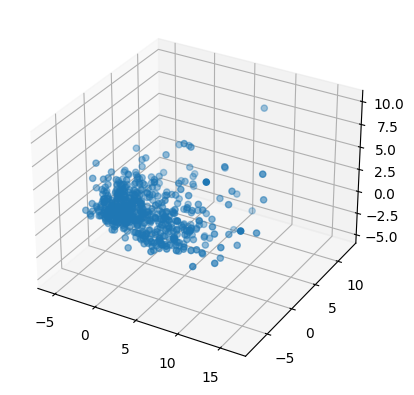

In [15]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:,0], X_pca[:,1],X_pca[:,2])
# Use the function below, but replace the value x, y and z
# with the appropriate one from your dataset that contains
# 3 features. Separate the 2 different classes with 2 
# different colors.
#ax.scatter(x, y, z)

## Clustering with k-means algorithm

In this part, you are going to implement from scratch the k-means algorithm.

### Loading and visualizing the data

The data we are going to use are inside `data-clustering.csv`.

In [16]:
# Look at the first 10 rows of this file with the bash UNIX
# command `head`.
!head data-clustering.csv

'head' n'est pas reconnu en tant que commande interne
ou externe, un programme ex‚cutable ou un fichier de commandes.


It seems that we have 2 columns, named V1 and V2. Let's load it into 2 ndarrays: x and y.

In [17]:
import numpy as np
lines = open("data_clustering.csv").read().split()[1:]
x = np.array([line.split(',')[0] for line in lines], 
             dtype=np.float32)
y = np.array([line.split(',')[1] for line in lines], 
             dtype=np.float32)

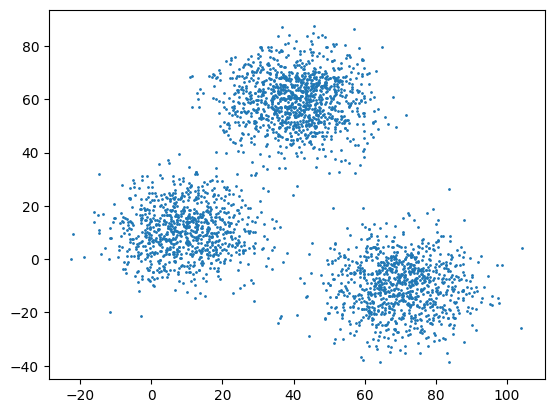

In [18]:
# Now plot the points (x, y) with matplotlib. Modify the 
# value of the argument `s` so that points are not too big.
plt.figure()
plt.scatter(x,y,s=1)

In [19]:
# How many clusters do you think there are ?
#There seems to be 3 clusters

### Distance function

The algorithm requires a distance (so we can compute which centroid is closer for each point). Implement a function `distance` that takes 2 arguments (two vectors as ndarray) and return the distance between them. Hint: the distance between two vectors can be computed with 

\begin{equation}
d(u, v) = \sqrt{\sum_{i=0}^k (u_i - v_i)^2}
\end{equation}

In [20]:
import math
def distance( x, y):
    sum=0
    for i in range(0,len(x)):
        sum=sum+((x[i]-y[i])*(x[i]-y[i]))
    sum=math.sqrt(sum)
    return sum
def somme(x,y,cluster,numero):
    sumX=0
    sumY=0
    compteur=0;
    for i in range(0,len(x)):
        if(cluster[i]==numero):
            sumX=sumX+x[i]
            sumY=sumY+y[i]
            compteur=compteur+1
        
    sumX=sumX/compteur
    sumY=sumY/compteur
    return [sumX,sumY]

### Algorithm: 1-step

Before implementing the complete algorithm, let's start with only one step. You need the following things before starting :
* define a constant variable K
* declare an empty array `clusters` that has the same size as x. We will put in each cell $i$ the cluster assigned to $x_i$
* create an array `centroids` where you will store the centroids

Then implement only one step from the algorithm described in the course (i.e. one iteration of the **while** loop).

First centroids:


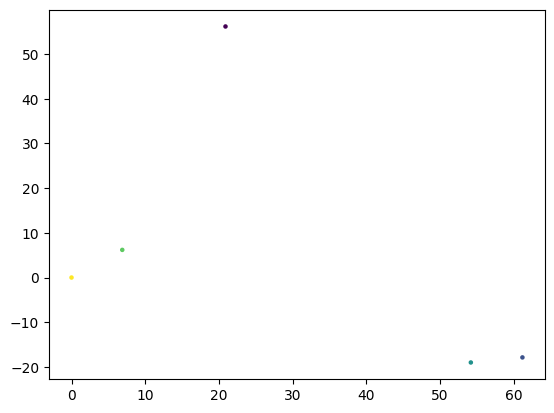

Spliting:


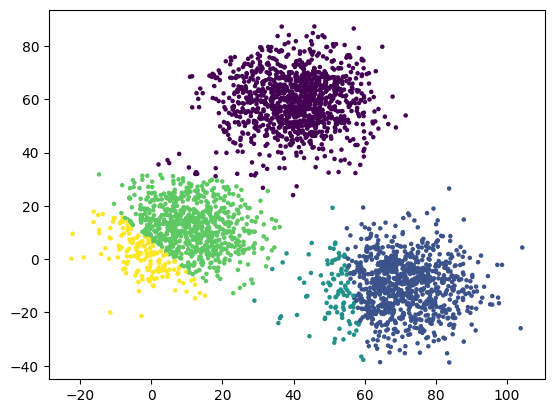

New centroids:


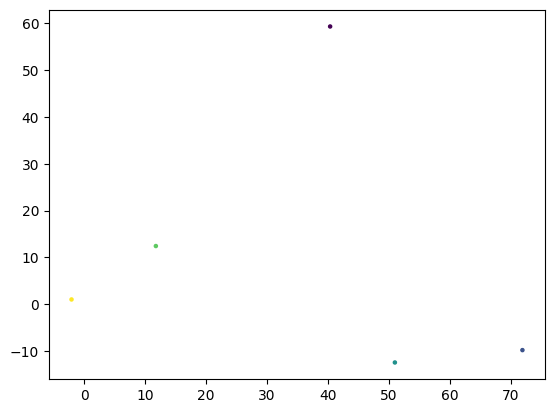

In [21]:
import random
import matplotlib.pyplot as plt

K=5
clusters=[0]*len(x)
centroids=[[0,0]]*K
for i in range(0,K-1):
    point=random.randrange(len(x))
    centroids[i]=[x[point],y[point]]
clusterPrevious=[1]*len(x)
print("First centroids:")
plt.scatter(np.array(centroids)[:,0],np.array(centroids)[:,1], c=range(0,K), s=5)
plt.show()

clusterPrevious=clusters
for i in range(0,len(x)):
    distances=[0]*K
    for u in range(0,K):
        distances[u]=distance([x[i],y[i]],centroids[u])
    distMin=np.amin(distances)
    for u in range(0,K):
        if(distances[u]==distMin):
            clusters[i]=u+1
for u in range(0,K):
    centroids[u]=somme(x,y,clusters,u+1)
print("Spliting:")    
plt.scatter(x,y, c=clusters, s=5)
plt.show()
print("New centroids:")
plt.scatter(np.array(centroids)[:,0],np.array(centroids)[:,1], c=range(0,K), s=5)
plt.show()        
        

After running one iteration, you can plot on the same figure:
* all points
* the first centroids chosen at random
* the new updated centroids

Do you see the beginning of an improvement ?

In [22]:
#The centroids that were close were putted away from each other so that the splitting is better. It's an improvement

### Algorithm: mutiple steps

The algorithm will repeat steps like the one you created a certain amount of time before convergence. We can consider the algorithm has converged when it does not update the values of centroids any longer (i.e. the distance between old and updated centroids is 0 for each centroid). Implement the full algorithm.

In [23]:
import random
import matplotlib.pyplot as plt
def algorithm(x_,y_,k_=3):
    x=x_;
    y=y_;
    K=k_
    clusters=[0]*len(x)
    centroids=[[0,0]]*K
    for i in range(0,K-1):
        point=random.randrange(len(x))
        centroids[i]=[x[point],y[point]]
    clusterPrevious=[1]*len(x)
    print("Centroids:")
    plt.scatter(np.array(centroids)[:,0],np.array(centroids)[:,1], c=range(0,K), s=5)
    plt.show()
    while(clusters!=clusterPrevious):
        clusterPrevious=clusters
        for i in range(0,len(x)):
            distances=[0]*K
            for u in range(0,K):
                distances[u]=distance([x[i],y[i]],centroids[u])
            distMin=np.amin(distances)
            for u in range(0,K):
                if(distances[u]==distMin):
                    clusters[i]=u+1
        for u in range(0,K):
            centroids[u]=somme(x,y,clusters,u+1)
    print("Spliting:")    
    plt.scatter(x,y, c=clusters, s=5)
    plt.show()

Now, print each cluster on a 2D plan as well as all the points contained inside them. Assign a different color for each group. Do you see something that seems correct ? (i.e. as a human, what would have you done ?)

Centroids:


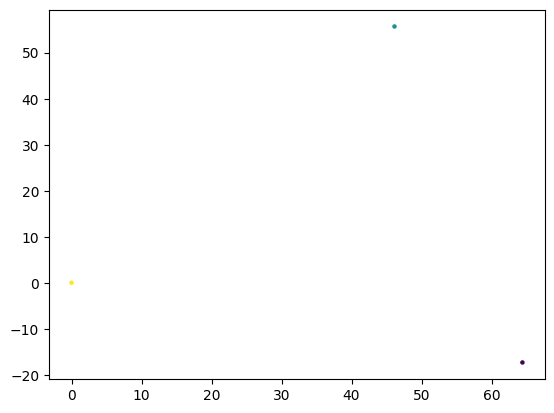

Spliting:


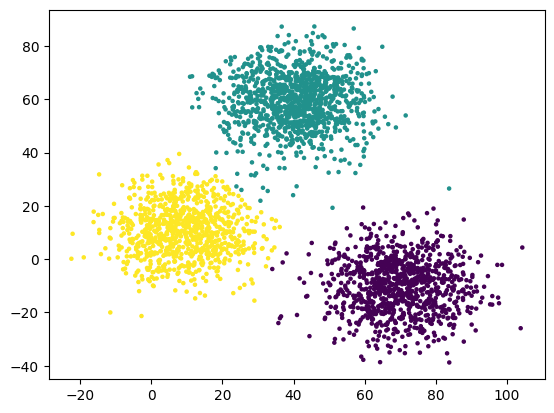

In [28]:
algorithm(x,y,3)
#For me it seems correct following the centroids that were taken but it's not what I would have done as a human. Depending on 
# first centroids the clusters can be well identified or not.

Run again your algorithm but with a different value for k. What happens ? Do you think it is a good idea to put a high value for k (k > 10) when the number of clusters is small (< 5) ?

Centroids:


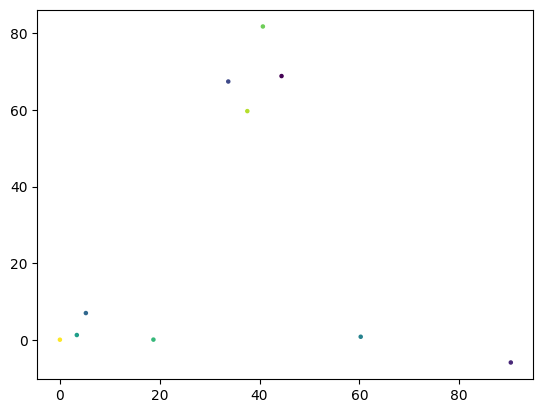

Spliting:


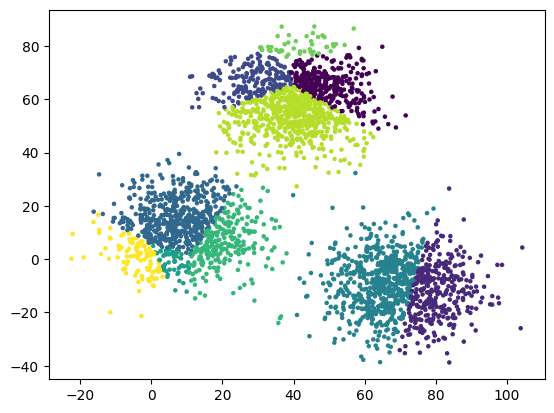

In [25]:
algorithm(x,y,10)
#If you take a too big K for a little amount of clusters it gets useless because you split the clusters and you will not get the 
#informations that you want to. (To put each clusters in different classes)

Centroids:


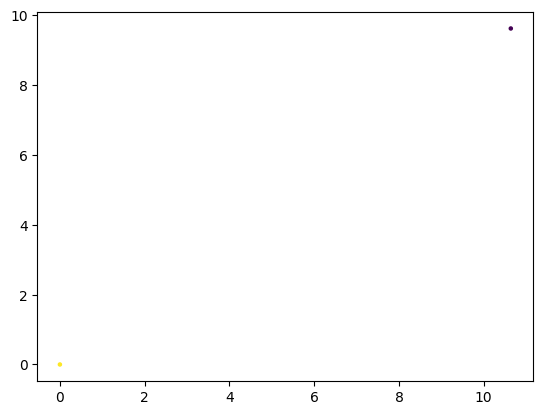

Spliting:


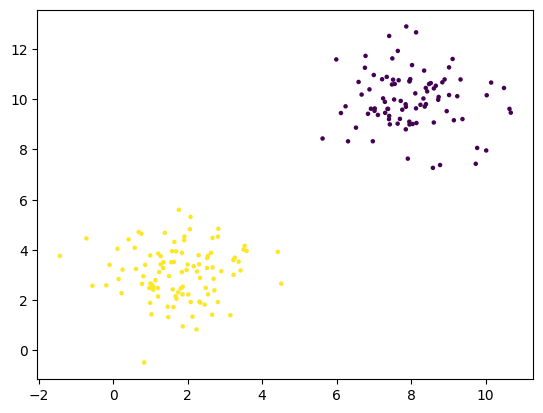

In [32]:
#Set took from kaggle to learn clustering https://www.kaggle.com/datasets/imanjowkar/clustering
lines = open("Clustering_kaggle.csv").read().split()[1:]
x = np.array([line.split(',')[1] for line in lines], 
             dtype=np.float32)
y = np.array([line.split(',')[2] for line in lines], 
             dtype=np.float32)
algorithm(x,y,2)